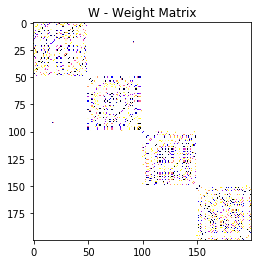

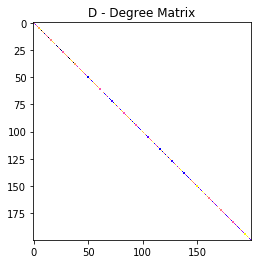

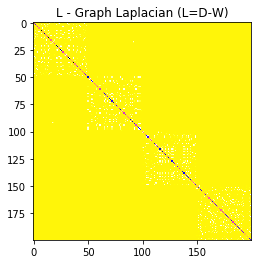

Output of KMeans Clustering


array([[ 5.15760496e-02,  1.73472348e-17, -1.73472348e-17,
         5.20978289e-02],
       [ 3.74700271e-16,  7.08194764e-02, -1.35879957e-08,
         4.02781107e-17],
       [ 5.15760528e-02,  1.73472348e-17, -4.46670478e-13,
        -5.10529768e-02],
       [-3.81639165e-17, -2.81025203e-16, -7.40265216e-02,
         3.96817995e-17]])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

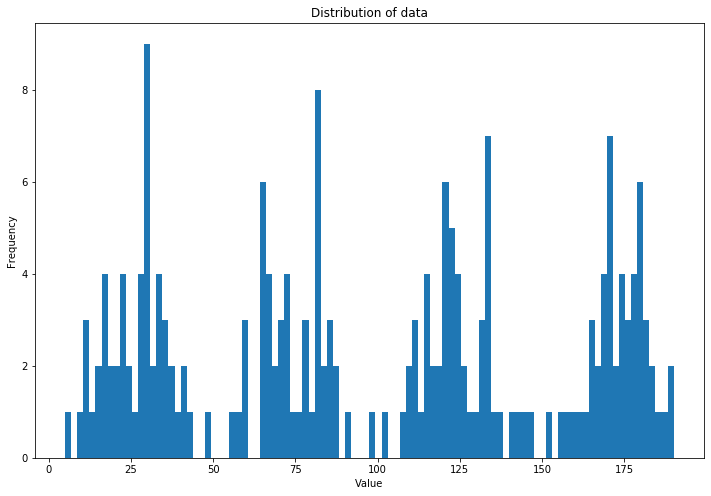

Cluster counts and Ranges:


,Label,count,min,max
1,1,52,4.993312,48.629459
3,3,46,56.698777,90.402696
2,2,52,98.848946,146.871850
0,0,50,152.271168,189.980209


(200,)


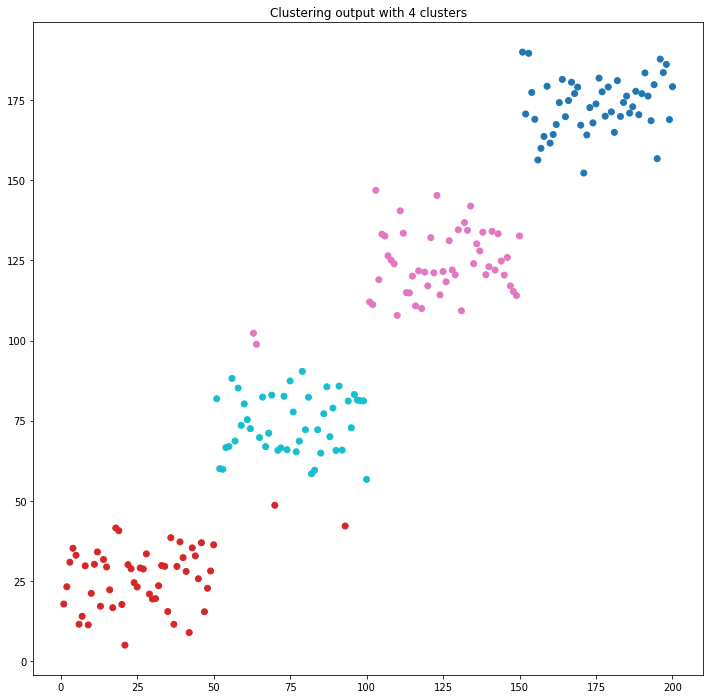

In [7]:
import scipy as sp
import scipy.linalg as linalg
from sklearn.cluster import KMeans
import numpy as np
import spectral_clustering_helper as scplot
import pandas as pd


########################
#       Parameters     #
########################

k=4 #Number of clusters (segments of graphs to create)
dist_centers = [25,75,125,175]
dist_sd = 10
dist_cnt = 50



########################
#       Setup etc      #
########################

#Functions 
def similarity(x,y):
    return sp.exp((-(x-y)**2)/2)

#Initialize Graph Vertices and construct L,D and W
x_list = sp.concatenate([sp.random.normal(c,dist_sd,dist_cnt) for c in dist_centers])

L,W,D = scplot.createMatrices(x_list, similarity)


#Plot L,D and W
scplot.plot_matrix(W, "W - Weight Matrix")
scplot.plot_matrix(D,"D - Degree Matrix")
scplot.plot_matrix(L,"L - Graph Laplacian (L=D-W)")



########################
#       Clustering     #
########################

# eigen values and clustering
e_val,e_vec = linalg.eigh(L,D)

km = KMeans(n_clusters=k).fit(e_vec[:,0:k])

# plot output
print("Output of KMeans Clustering")
display(km.cluster_centers_)
display(km.labels_)

########################
#       Outputs        #
########################

data_cluster = pd.DataFrame({'Data':x_list, 'Label':km.labels_})
data_cluster_result = data_cluster.groupby('Label').Data.agg(['count','min','max']).reset_index()
data_cluster_result.sort_values('min', inplace=True)

scplot.plot_histo(x_list)

print("Cluster counts and Ranges:")
display(data_cluster_result)
    
scplot.plot_clusters(x_list,km.labels_,"Clustering output with "+str(k)+" clusters")




Interesting observation:

also affected by number of eigen vectors chosen similar to un-normalized variant.

In [2]:
pd.DataFrame(D).to_csv("D3.csv")

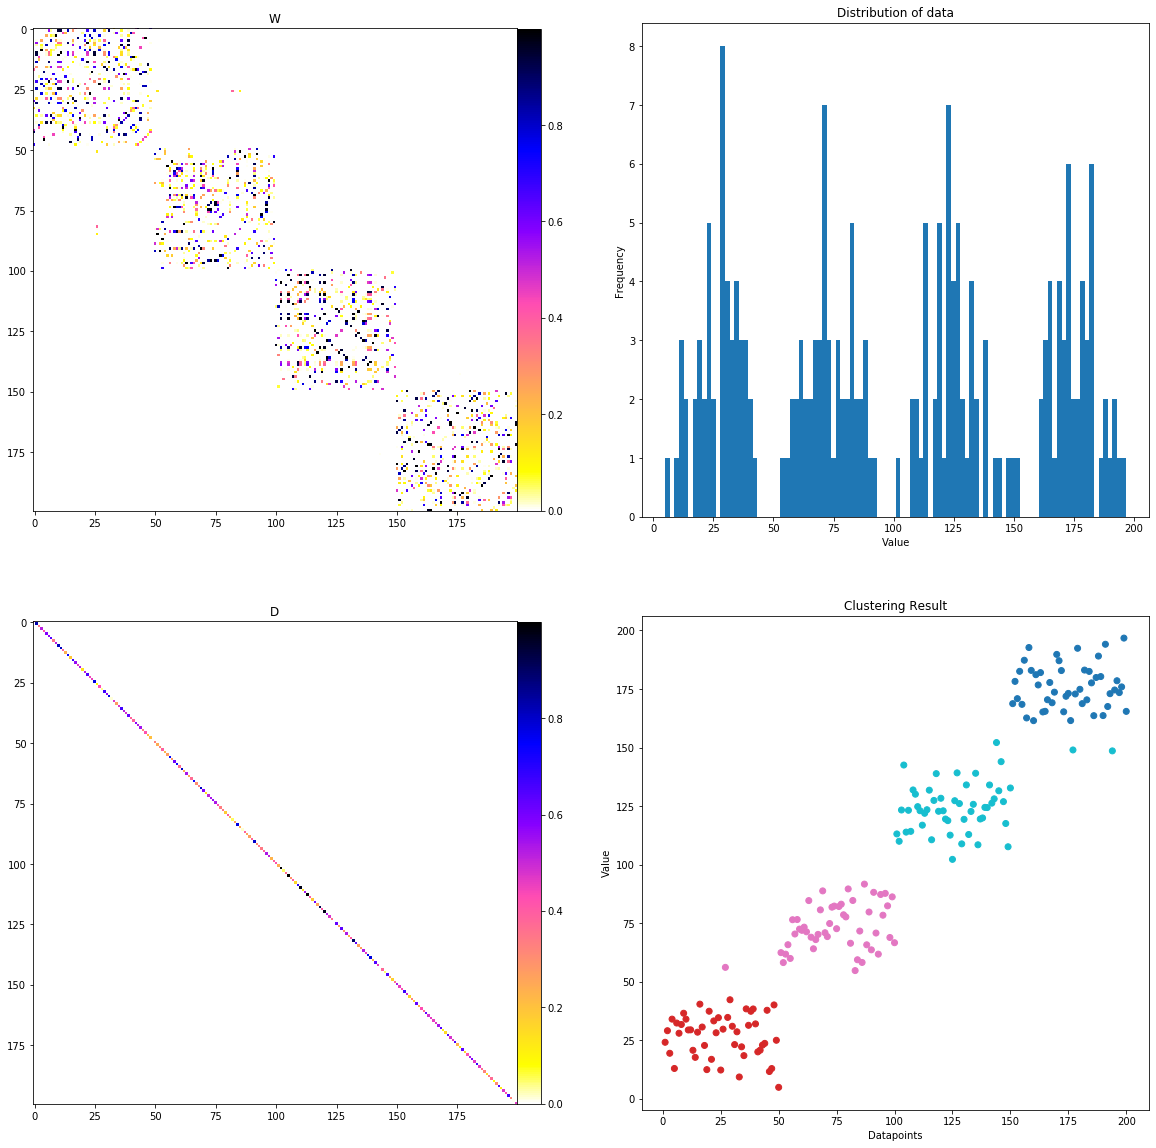

In [2]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

figure = plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
im=plt.imshow(W, cmap=plt.cm.gnuplot2.reversed())
plt.title("W")
plt.colorbar(im, fraction=0.0475, pad=0.0)
plt.gca().xaxis.tick_bottom()

plt.subplot(2,2,3)
plt.imshow(D, cmap=plt.cm.gnuplot2.reversed())
plt.title("D")
plt.gca().xaxis.tick_bottom()
plt.colorbar(im, fraction=0.0475, pad=0.0)

plt.subplot(2,2,2)
plt.hist(x_list, bins=100)
plt.title("Distribution of data")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(2,2,4)
data = x_list
groups = km.labels_
if len(data.shape) ==1 :
    plt.scatter(range(1,len(data)+1),data,c=groups, cmap='tab10') 
else:
    plt.scatter(data[:,0],data[:,1],c=groups, cmap='tab10')
plt.title("Clustering Result")
plt.xlabel("Datapoints")
plt.ylabel("Value")
plt.show()
figure.savefig("1DCluster.jpg")
plt.close()
